# Question:

What is the magnitude of economic impact that COVID-19 has had on the tourism industry in Canada?


In [1]:
#Import dependancies

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
# Read in Stats Canada data on Employment generated by tourism (x 1,000) jobs in 2 files and merge data. 

tourism_empl_Q3_18_Q1_19 = os.path.join("Employment Tourism Canada Q3 18 to Q1 19.csv")
tourism_empl_Q3_18_Q1_19_df = pd.read_csv(tourism_empl_Q3_18_Q1_19)
tourism_empl_Q3_18_Q1_19_df = tourism_empl_Q3_18_Q1_19_df.dropna()

tourism_empl_Q2_19_Q2_20 = os.path.join("Employment Tourism Canada Q2 19 to Q2 20.csv")
tourism_empl_Q2_19_Q2_20_df = pd.read_csv(tourism_empl_Q2_19_Q2_20)
tourism_empl_Q2_19_Q2_20_df = tourism_empl_Q2_19_Q2_20_df.dropna()

employment_merged = pd.merge(tourism_empl_Q3_18_Q1_19_df, tourism_empl_Q2_19_Q2_20_df, on = "Activities" )
employment_merged

,Activities,Q3 2018,Q4 2018,Q1 2019,Q2 2019,Q3 2019,Q4 2019,Q1 2020,Q2 2020
0,Tourism activities,742,742.4,745.2,746.1,748.3,752.2,705.4,392.4
1,Total tourism industries,585.6,585.1,587.4,587.9,590.4,594.4,555.7,296.1
2,Transportation,86.9,84.2,85.6,85.3,87.0,88.8,85.4,65.7
3,Air transportation,54.6,54.1,55.4,54.8,56.4,58.6,57.5,47.0
4,Other transportation,32.3,30.1,30.2,30.5,30.6,30.2,27.9,18.7
5,Accommodation,149.9,150.5,151.3,150.6,151.6,152.5,142.3,65.0
6,Food and beverage services,236.3,237.3,236.7,238,237.3,238.2,219.0,103.6
7,Other tourism activities,112.5,113.1,113.8,114,114.5,114.9,109.0,61.8
8,Recreation and entertainment,68.3,69.3,68.6,69.1,69.6,69.9,66.5,31.4
9,Travel agencies,44.2,43.8,45.2,44.9,44.9,45.0,42.5,30.4


In [3]:
employment_sum = employment_merged.drop([1,2,3,4,5,6,7,8,9,10])
employment_sum = employment_sum.transpose()

employment_sum.columns = employment_sum.iloc[0]
employment_sum_trans = employment_sum[1:]


employment_sum_trans

Activities,Tourism activities
Q3 2018,742
Q4 2018,742.4
Q1 2019,745.2
Q2 2019,746.1
Q3 2019,748.3
Q4 2019,752.2
Q1 2020,705.4
Q2 2020,392.4


In [4]:
employment_sum_trans['Tourism activities'].dtype

dtype('O')

In [5]:
# Convert to numeric data type

In [6]:
# Read in Stats Canada data on Tourism demand in Canada, constant prices (x 1,000,000) dollars in 2 files and merge data. 

tourism_demand_Q3_18_Q2_19 = os.path.join("Tourism Demand Canada Q3 18 Q2 19.csv")
tourism_demand_Q3_18_Q2_19_df = pd.read_csv(tourism_demand_Q3_18_Q2_19)
tourism_demand_Q3_18_Q2_19_df = tourism_demand_Q3_18_Q2_19_df.dropna()
tourism_demand_Q3_18_Q2_19_df

tourism_demand_Q3_19_Q2_20 = os.path.join("Tourism Demand Canada Q3 19 Q2 20.csv")
tourism_demand_Q3_19_Q2_20_df = pd.read_csv(tourism_demand_Q3_19_Q2_20)
tourism_demand_Q3_19_Q2_20_df = tourism_demand_Q3_19_Q2_20_df.dropna()

demand_merged = pd.merge(tourism_demand_Q3_18_Q2_19_df, tourism_demand_Q3_19_Q2_20_df, on = "Expenditures")
demand_merged

,Expenditures,Q3 2018,Q4 2018,Q1 2019,Q2 2019,Q3 2019,Q4 2019,Q1 2020,Q2 2020
0,Tourism expenditures,"23,976","24,038","24,105","24,213","24,192","24,211","20,760","6,988"
1,Total tourism commodities,"20,284","20,356","20,411","20,523","20,489","20,523","17,565","5,721"
2,Transportation,"10,056","10,064","10,120","10,119","10,071","10,140","8,662","1,947"
3,Passenger air transport,"5,700","5,717","5,760","5,756","5,703","5,785","4,875",247
4,Passenger rail transport,83,83,85,86,87,87,52,6
5,Interurban bus transport,193,162,158,160,160,147,139,29
6,Vehicle rental,310,310,312,317,319,315,300,99
7,Vehicle repairs and parts,727,734,746,747,731,732,640,317
8,Vehicle fuel,"2,846","2,857","2,858","2,851","2,869","2,869","2,480","1,200"
9,Other transportation,197,201,201,202,202,205,176,49


In [7]:
#Isolate for total tourism expenditures and transpose data. 

demand_sum = demand_merged.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
demand_sum = demand_sum.transpose()

demand_sum.columns = demand_sum.iloc[0]
demand_sum_trans = demand_sum[1:]

demand_sum_trans.reset_index(inplace =True)
demand_sum_trans.rename(columns = {"index":"Period"}, inplace=True)

demand_sum_trans


C:\Users\Heather\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Expenditures,Period,Tourism expenditures
0,Q3 2018,"23,976"
1,Q4 2018,"24,038"
2,Q1 2019,"24,105"
3,Q2 2019,"24,213"
4,Q3 2019,"24,192"
5,Q4 2019,"24,211"
6,Q1 2020,"20,760"
7,Q2 2020,"6,988"


In [8]:
# Convert from string to numeric data type
demand_sum_trans_int = demand_sum_trans.copy()
demand_sum_trans_int['Tourism expenditures'] = demand_sum_trans_int['Tourism expenditures'].str.replace(',', '').astype(int)
demand_sum_trans_int['Tourism expenditures'].dtype



dtype('int32')

In [9]:
# Read in Stats Canada data on Tourism gross domestic product (x 1,000,000) dollars in 2 files and merge data. 


tourism_gdp_Q3_18_Q1_19 = os.path.join("Tourism GDP Canada Q3 18 Q1 19.csv")
tourism_gdp_Q3_18_Q1_19_df = pd.read_csv(tourism_gdp_Q3_18_Q1_19)
tourism_gdp_Q3_18_Q1_19_df = tourism_gdp_Q3_18_Q1_19_df.dropna()


tourism_gdp_Q2_19_Q2_20 = os.path.join("Tourism GDP Canada Q2 19 Q2 20.csv")
tourism_gdp_Q2_19_Q2_20_df = pd.read_csv(tourism_gdp_Q2_19_Q2_20)
tourism_gdp_Q2_19_Q2_20_df = tourism_gdp_Q2_19_Q2_20_df.dropna()


gdp_merged = pd.merge(tourism_gdp_Q3_18_Q1_19_df, tourism_gdp_Q2_19_Q2_20_df, on = "Activities" )
gdp_merged

,Activities,Q3 2018,Q4 2018,Q1 2019,Q2 2019,Q3 2019,Q4 2019,Q1 2020,Q2 2020
0,Tourism gross domestic product (GDP),"9,799","9,813","9,847","9,950","9,932","9,986","8,525","2,867"
1,Total tourism industries,"7,146","7,159","7,183","7,280","7,268","7,331","6,206","1,675"
2,Transportation,"2,461","2,440","2,450","2,480","2,460","2,500","2,034",204
3,Accommodation,"1,979","2,000","2,016","2,061","2,076","2,094","1,819",586
4,Food and beverage services,"1,458","1,462","1,457","1,466","1,461","1,467","1,256",503
5,Other tourism industries,"1,248","1,257","1,260","1,273","1,271","1,270","1,097",382
6,Other industries,"2,653","2,654","2,664","2,670","2,664","2,655","2,319","1,192"


In [10]:
gdp_sum = gdp_merged.drop([1,2,3,4,5,6])
gdp_sum = gdp_sum.transpose()

gdp_sum.columns = gdp_sum.iloc[0]
gdp_sum_trans =gdp_sum[1:]

gdp_sum_trans.reset_index(inplace =True)
gdp_sum_trans.rename(columns = {"index":"Period"}, inplace=True)

gdp_sum_trans

C:\Users\Heather\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Activities,Period,Tourism gross domestic product (GDP)
0,Q3 2018,"9,799"
1,Q4 2018,"9,813"
2,Q1 2019,"9,847"
3,Q2 2019,"9,950"
4,Q3 2019,"9,932"
5,Q4 2019,"9,986"
6,Q1 2020,"8,525"
7,Q2 2020,"2,867"


In [11]:
# Convert from string to numeric
gdp_sum_trans_int = gdp_sum_trans.copy()
gdp_sum_trans_int['Tourism gross domestic product (GDP)'] = gdp_sum_trans_int['Tourism gross domestic product (GDP)'].str.replace(',', '').astype(int)
gdp_sum_trans_int['Tourism gross domestic product (GDP)'].dtype

dtype('int32')

In [12]:
#Merge Tourism Expenditure $ and GDP $ data 
merged_dollar = pd.merge(gdp_sum_trans_int, demand_sum_trans_int, on = "Period")
merged_dollar

,Period,Tourism gross domestic product (GDP),Tourism expenditures
0,Q3 2018,9799,23976
1,Q4 2018,9813,24038
2,Q1 2019,9847,24105
3,Q2 2019,9950,24213
4,Q3 2019,9932,24192
5,Q4 2019,9986,24211
6,Q1 2020,8525,20760
7,Q2 2020,2867,6988


In [14]:
#Seperate data for "pre-covid" - up to Q4 2019
pre_covid = merged_dollar.drop([6,7])
pre_covid['Period No'] = [1,2,3,4,5,6]
pre_covid

,Period,Tourism gross domestic product (GDP),Tourism expenditures,Period No
0,Q3 2018,9799,23976,1
1,Q4 2018,9813,24038,2
2,Q1 2019,9847,24105,3
3,Q2 2019,9950,24213,4
4,Q3 2019,9932,24192,5
5,Q4 2019,9986,24211,6


In [15]:
# Calculate linear regression model for results pre-covid (up to Q4 2019)

x =pre_covid['Period No']
y = pre_covid['Tourism gross domestic product (GDP)']
y2 = pre_covid['Tourism expenditures']

gdp_slope, gdp_int, gdp_r, gdp_p, gdp_std_err = st.linregress(x,y)
gdp_fit = gdp_slope * x + gdp_int

exp_slope, exp_int, exp_r, exp_p, exp_std_err = st.linregress(x,y2)
exp_fit = exp_slope * x + exp_int


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

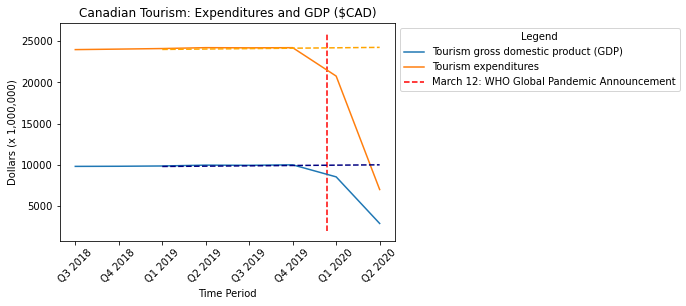

In [16]:
# Plot combined Tourism Expenditure $ and GDP $ data 

merged_dollar.plot()
plt.title("Canadian Tourism: Expenditures and GDP ($CAD)")
plt.ylabel("Dollars (x 1,000,000)")
plt.xlabel("Time Period")
x_ticks=np.arange(len(merged_dollar["Period"]))
plt.xticks(x_ticks, ["Q3 2018", "Q4 2018", "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019", "Q1 2020", "Q2 2020"], rotation=45)

plt.plot((x+1),gdp_fit,"--",color="navy")
plt.plot((x+1),exp_fit,"--",color="orange")

plt.vlines(5.79, 2000, 26000, colors='r', linestyles='dashed', label='March 12: WHO Global Pandemic Announcement',data=None)
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout

In [17]:
# Compare Q1 and Q2 2020 actual vs. projected based on line equation. Bar graph?

pre_covid = merged_dollar.drop([0,1,2,3,4,5])
pre_covid = pre_covid.rename(columns={"Tourism gross domestic product (GDP)": "GDP Actual", "Tourism expenditures":"Expenditures Actuals"})
pre_covid


,Period,GDP Actual,Expenditures Actuals
6,Q1 2020,8525,20760
7,Q2 2020,2867,6988
